# Teste A3Data
> Candidato: Daniel Moysés M. D. Oliveira<br><br>
> Apresentação em formato PDF, que deve conter: <br>
> *	Apresentação do desafio <br>
> *	Explicação do processo utilizado <br>
> *	Hipóteses levantadas <br>
> * Análise exploratória <br>
> *	Conclusões e insights gerados<br>

> Base de dados:  Ocorrências Aeronáuticas na Aviação Civil Brasileira<br>
> A base de dados possui 5 tabelas<br><br>
> Tabelas (arquivos)<br>
> *	OCORRÊNCIA.csv - Informações sobre as ocorrências.<br>
> *	OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.<br>
> *	AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.<br>
> *	FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.<br>
> *	RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.<br>


# Carregando Libs e Datasets
> Merge de todos os DataFrames sendo criado

In [1]:
import pandas as pd
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',2000)
pd.set_option('display.max_colwidth',300)
import seaborn as sns
import requests
import json
import math
from datetime import date
from time import sleep
import matplotlib.pyplot as plt  
from sklearn.decomposition import PCA
import numpy as np
import warnings
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline

ocorrencias = pd.read_csv('ocorrencia.csv', sep=';')
ocorrenciaTipo = pd.read_csv('ocorrencia_tipo.csv', sep=';')
aeronave = pd.read_csv('aeronave.csv', sep=';')
fator_contribuinte = pd.read_csv('fator_contribuinte.csv', sep=';')
recomendacao = pd.read_csv('recomendacao.csv', sep=';')

df1 = pd.merge(ocorrencias,ocorrenciaTipo, on='codigo_ocorrencia1', how='left')
df2 = pd.merge(df1,aeronave, on='codigo_ocorrencia2', how='left')
df3 = pd.merge(df2,fator_contribuinte, on='codigo_ocorrencia3', how='left')
finaldf = pd.merge(df3,recomendacao, on='codigo_ocorrencia4', how='left')
finaldf


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,SBPA,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | ESTOURO DE PNEU,SCF-NP,PRCDL,PARTICULAR,AVIÃO,RAYTHEON AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,2495,2495,6.0,2003.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,18600,50.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,"Atuar junto às empresas que operam segundo o RBAC 121 de forma tal que assegure que o treinamento de Corporate Ressource Management (CRM) esteja adequado a realidade daquela empresa, que seja constantemente avaliado e reforçado (com a participação da alta direção), envolva todos os profissionais...",CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,18600,50.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,"Atuar junto à Administração do Aeroporto Internacional de Guarulhos, de forma que este passe a ministrar treinamento teórico e prático de atendimento às vítimas de acidentes envolvendo os principais tipos de aeronaves que operam naquela localidade, principalmente os das Linhas Aéreas Regulares, ...",CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,18600,50.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA

# Análise Exploratória

In [2]:
finaldf.isna().sum()

codigo_ocorrencia                     0
codigo_ocorrencia1                    0
codigo_ocorrencia2                    0
codigo_ocorrencia3                    0
codigo_ocorrencia4                    0
ocorrencia_classificacao              0
ocorrencia_latitude                 983
ocorrencia_longitude                983
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_pais                       0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       1
investigacao_aeronave_liberada      953
investigacao_status                 261
divulgacao_relatorio_numero         411
divulgacao_relatorio_publicado        0
divulgacao_dia_publicacao          3993
total_recomendacoes                   0
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_tipo                       1
ocorrencia_tipo_categoria             1
taxonomia_tipo_icao                   1


In [3]:
finaldf.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,total_recomendacoes,total_aeronaves_envolvidas,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total
count,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.00000,12167.00000,11926.000000,11921.000000,12167.000000
mean,62428.909592,62428.909592,62428.909592,62428.909592,62428.909592,2.275581,1.054574,14352.33821,14352.33821,23.956146,1893.589883,0.629325
std,13560.239622,13560.239622,13560.239622,13560.239622,13560.239622,3.018723,0.230389,38808.99191,38808.99191,54.111978,441.206994,1.578935
min,45331.000000,45331.000000,45331.000000,45331.000000,45331.000000,0.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,50320.000000,50320.000000,50320.000000,50320.000000,50320.000000,0.000000,1.000000,1224.00000,1224.00000,2.000000,1978.000000,0.000000
50%,53626.000000,53626.000000,53626.000000,53626.000000,53626.000000,1.000000,1.000000,2018.00000,2018.00000,6.000000,1992.000000,0.000000
75%,78031.000000,78031.000000,78031.000000,78031.000000,78031.000000,3.000000,1.000000,4920.00000,4920.00000,9.000000,2007.000000,0.000000
max,80468.000000,80468.000000,80468.000000,80468.000000,80468.000000,13.000000,3.000000,396895.00000,396895.00000,384.000000,9999.000000,10.000000


In [4]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12167 entries, 0 to 12166
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_ocorrencia                12167 non-null  int64  
 1   codigo_ocorrencia1               12167 non-null  int64  
 2   codigo_ocorrencia2               12167 non-null  int64  
 3   codigo_ocorrencia3               12167 non-null  int64  
 4   codigo_ocorrencia4               12167 non-null  int64  
 5   ocorrencia_classificacao         12167 non-null  object 
 6   ocorrencia_latitude              11184 non-null  object 
 7   ocorrencia_longitude             11184 non-null  object 
 8   ocorrencia_cidade                12167 non-null  object 
 9   ocorrencia_uf                    12167 non-null  object 
 10  ocorrencia_pais                  12167 non-null  object 
 11  ocorrencia_aerodromo             12167 non-null  object 
 12  ocorrencia_dia    

In [5]:
finaldf.nunique()

codigo_ocorrencia                  5167
codigo_ocorrencia1                 5167
codigo_ocorrencia2                 5167
codigo_ocorrencia3                 5167
codigo_ocorrencia4                 5167
ocorrencia_classificacao              3
ocorrencia_latitude                2590
ocorrencia_longitude               2593
ocorrencia_cidade                  1053
ocorrencia_uf                        28
ocorrencia_pais                       1
ocorrencia_aerodromo                516
ocorrencia_dia                     2684
ocorrencia_hora                     923
investigacao_aeronave_liberada        3
investigacao_status                   2
divulgacao_relatorio_numero        1721
divulgacao_relatorio_publicado        2
divulgacao_dia_publicacao           179
total_recomendacoes                  13
total_aeronaves_envolvidas            3
ocorrencia_saida_pista                2
ocorrencia_tipo                      80
ocorrencia_tipo_categoria            80
taxonomia_tipo_icao                  32


<AxesSubplot:>

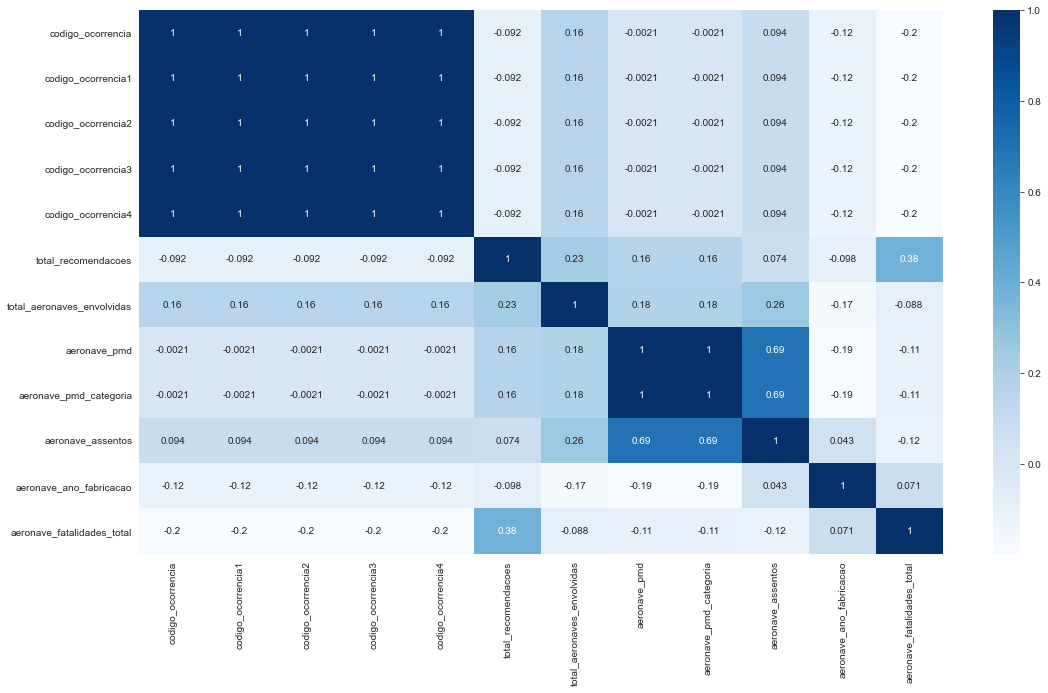

In [18]:
plt.figure(figsize=(18, 10))
sns.heatmap(finaldf.corr(), annot=True, cmap="Blues")

# Análise de Ocorrências por Estado(UF)

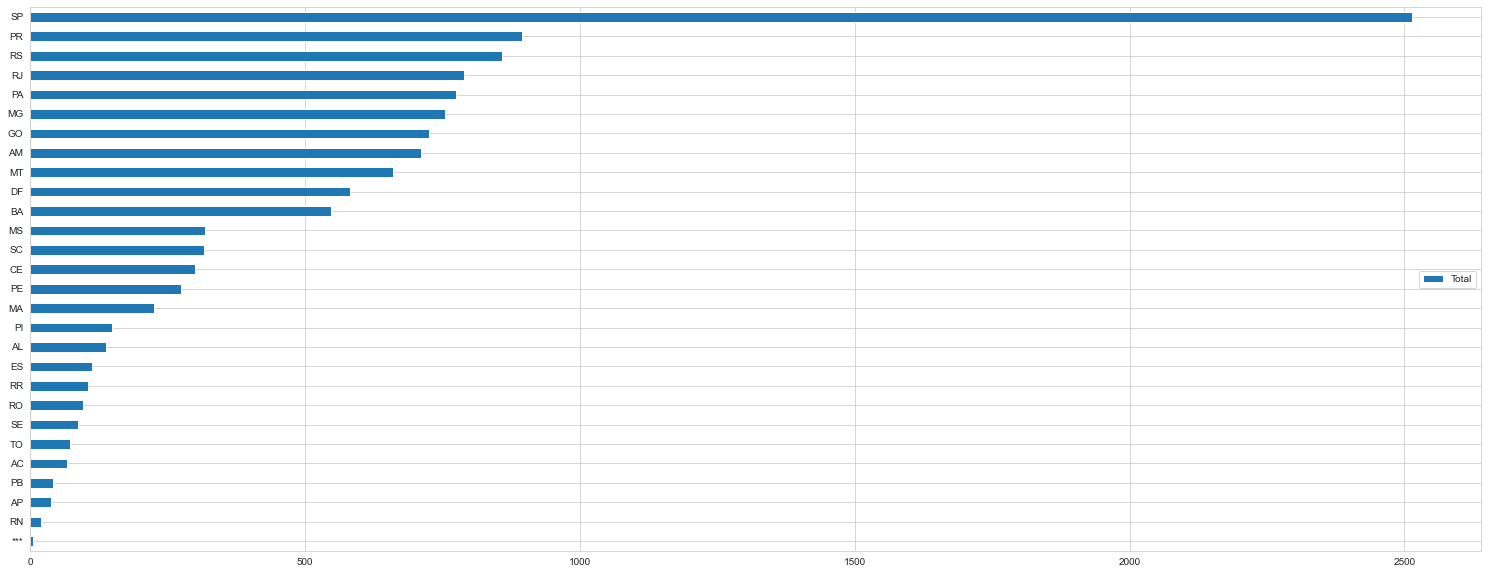

In [7]:
finaldf['ocorrencia_uf'].value_counts(ascending=True).plot(kind="barh",figsize=(26, 10))
plt.legend(['Total'], loc=7)

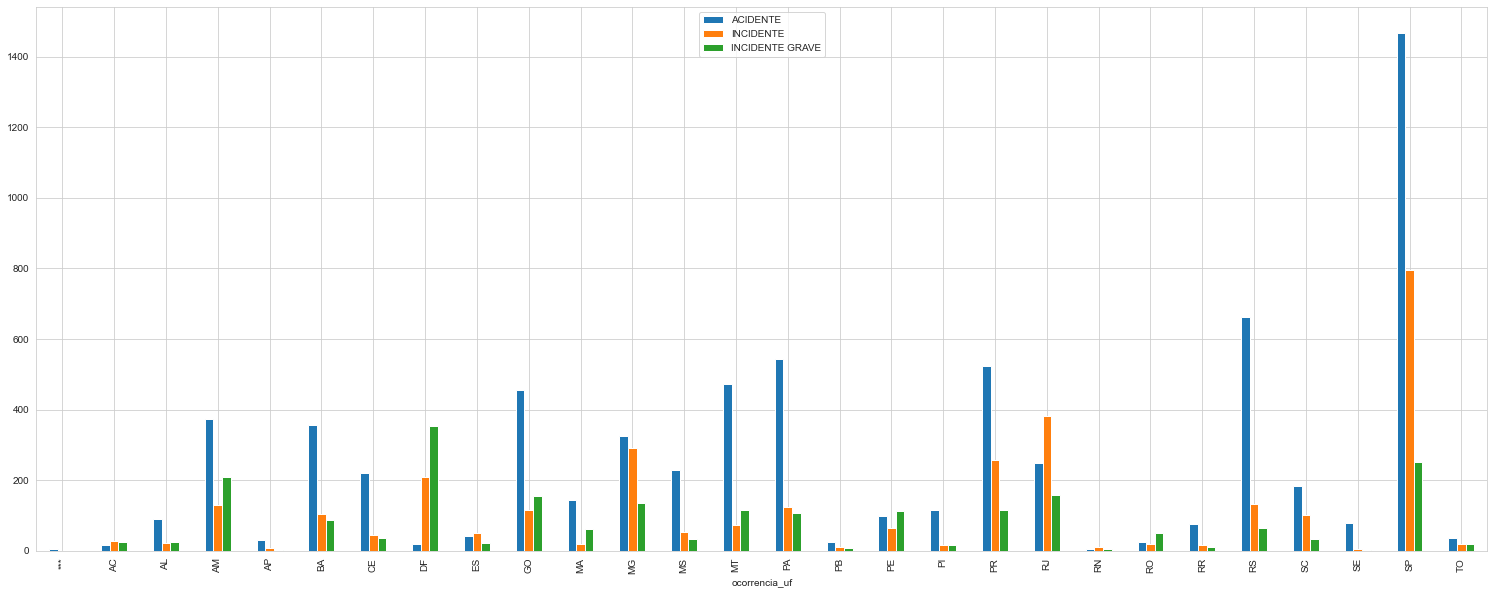

In [8]:
finaldf.groupby(['ocorrencia_uf'])['ocorrencia_classificacao'].value_counts().unstack().plot(kind="bar",figsize=(26, 10))
plt.legend(loc=9)

# Análise de Aeronaves em Ocorrências

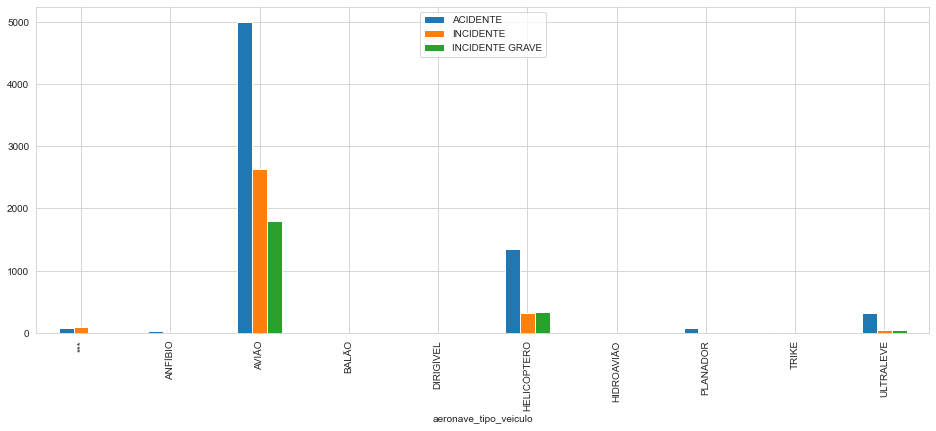

In [9]:
finaldf.groupby(['aeronave_tipo_veiculo'])['ocorrencia_classificacao'].value_counts().unstack().plot(kind="bar",figsize=(16, 6))
plt.legend(loc=9)

<AxesSubplot:>

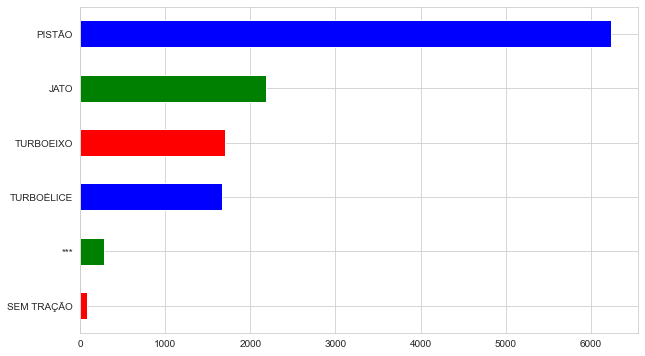

In [10]:
finaldf['aeronave_motor_tipo'].value_counts(ascending=True).plot(kind="barh",figsize=(10, 6), color=['red','green','blue'])

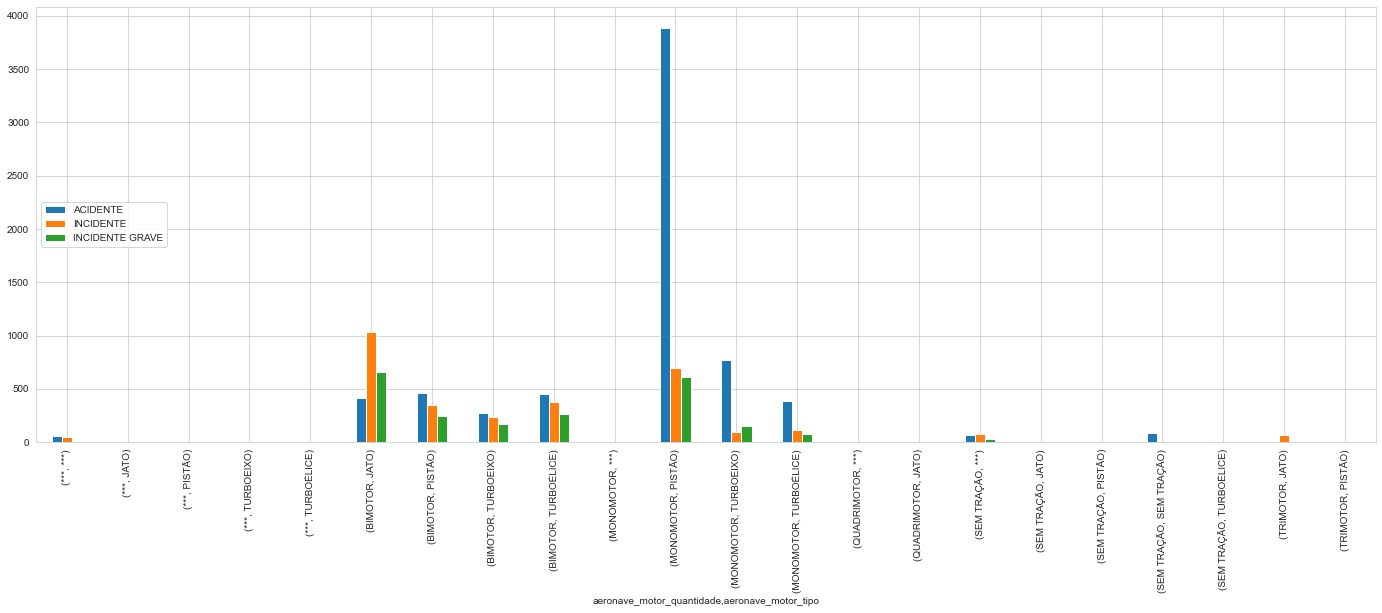

In [11]:
finaldf.groupby(['aeronave_motor_quantidade','aeronave_motor_tipo'])['ocorrencia_classificacao'].value_counts().unstack().plot(kind="bar",figsize=(24, 8))
plt.legend(loc=6)

# Análise das Ocorrências separadamente

## ACIDENTES

### Tipos de Ocorrências em acidentes

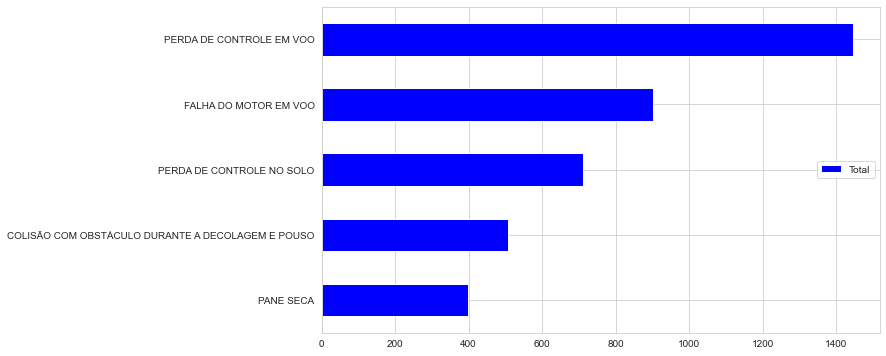

In [12]:
filtro3 = finaldf.ocorrencia_classificacao == 'ACIDENTE'
adf = finaldf[filtro3]
adf['ocorrencia_tipo'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(10, 6),color='blue')
plt.legend(['Total'], loc=7)

### Fatores contribuintes em acidentes

<AxesSubplot:>

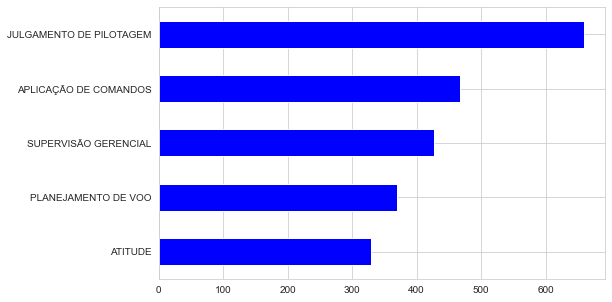

In [13]:
adf['fator_nome'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(8, 5),color='blue')
#plt.legend(['Total'], loc=7)

### Fabricantes envolvidos na maior parte dos acidentes

<AxesSubplot:>

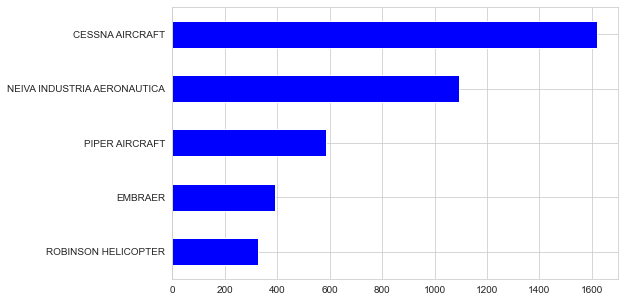

In [14]:
adf['aeronave_fabricante'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(8, 5),color='blue') 
#plt.legend(['Total'], loc=7)

In [15]:
adf['aeronave_fabricante'].value_counts(ascending=False, normalize=True).head() * 100

CESSNA AIRCRAFT                23.625492
NEIVA INDUSTRIA AERONAUTICA    15.925332
PIPER AIRCRAFT                  8.560595
EMBRAER                         5.745953
ROBINSON HELICOPTER             4.768849
Name: aeronave_fabricante, dtype: float64

### Modelos de Aeronaves envolvidas na maior parte dos acidentes

<AxesSubplot:>

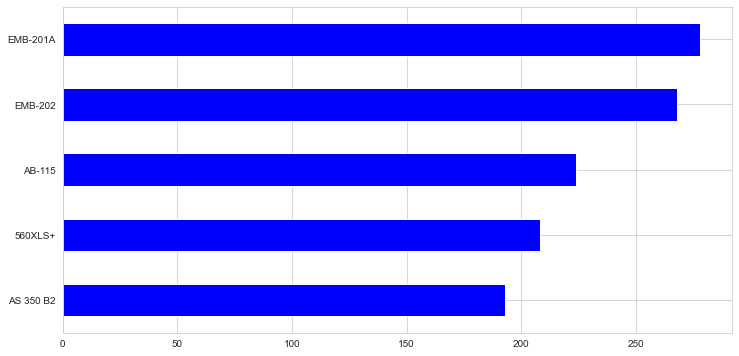

In [16]:
adf['aeronave_modelo'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(12, 6),color='blue')

In [17]:
adf['aeronave_modelo'].value_counts(ascending=False, normalize=True).head() * 100

EMB-201A     4.054251
EMB-202      3.908415
AB-115       3.266735
560XLS+      3.033397
AS 350 B2    2.814642
Name: aeronave_modelo, dtype: float64

## Incidentes

### Tipos de Ocorrências em incidentes

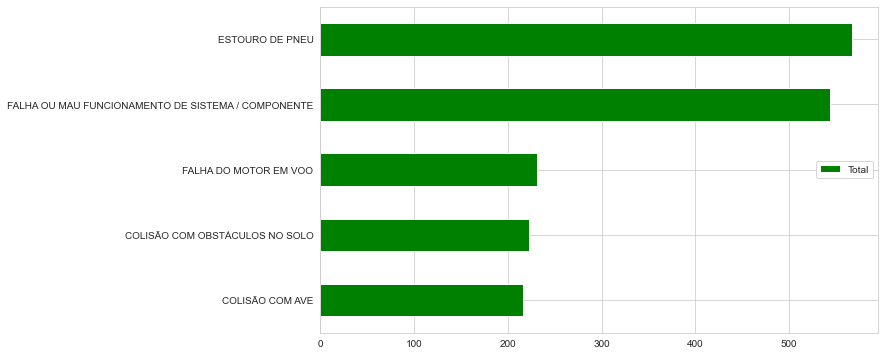

In [20]:
filtro2 = finaldf.ocorrencia_classificacao == 'INCIDENTE'
idf = finaldf[filtro2]
idf['ocorrencia_tipo'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(10, 6),color='green')
plt.legend(['Total'], loc=7)

### Fatores contribuintes em incidentes

<AxesSubplot:>

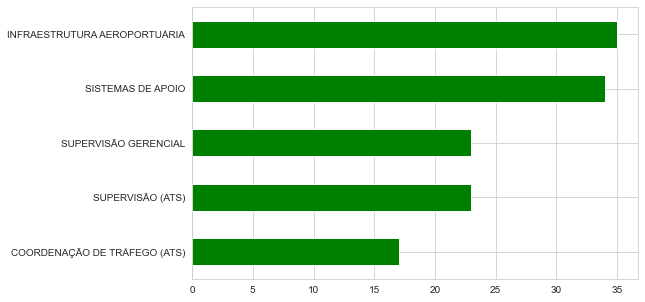

In [21]:
idf['fator_nome'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(8, 5),color='green')

### Fabricantes envolvidos na maior parte dos incidentes

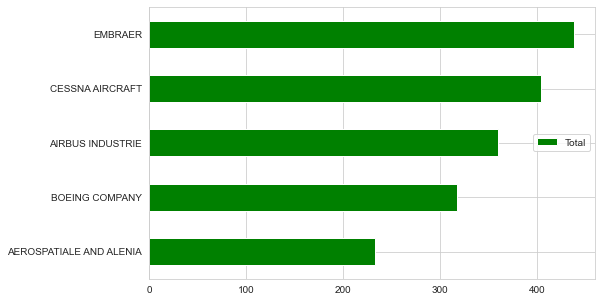

In [24]:
idf['aeronave_fabricante'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(8, 5),color='green')
#idf['aeronave_fabricante'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(10, 6),color='green', ax = axes[1],subplots=True)
plt.legend(['Total'], loc=7)

In [26]:
idf['aeronave_fabricante'].value_counts(ascending=False, normalize=True).head() * 100

EMBRAER                    14.124476
CESSNA AIRCRAFT            13.028055
AIRBUS INDUSTRIE           11.609158
BOEING COMPANY             10.222509
AEROSPATIALE AND ALENIA     7.513705
Name: aeronave_fabricante, dtype: float64

### Modelos de Aeronaves envolvidas na maior parte dos incidentes

<AxesSubplot:>

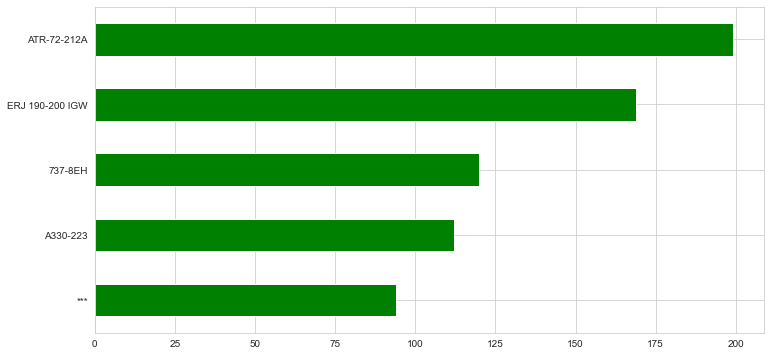

In [22]:
idf['aeronave_modelo'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(12, 6),color='green') 
#plt.legend(['Total'], loc=7)

In [23]:
idf['aeronave_modelo'].value_counts(ascending=False, normalize=True).head() * 100

ATR-72-212A        6.417285
ERJ 190-200 IGW    5.449855
737-8EH            3.869719
A330-223           3.611738
***                3.031280
Name: aeronave_modelo, dtype: float64

## Incidentes Graves

### Tipos de Ocorrências em incidentes graves

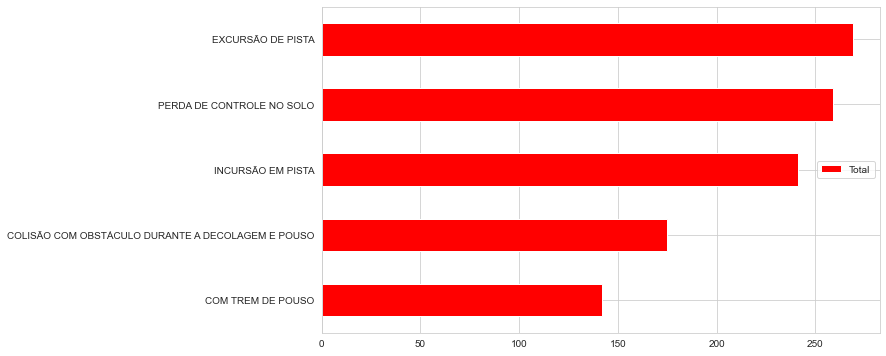

In [27]:
filtro = finaldf.ocorrencia_classificacao == 'INCIDENTE GRAVE'
igdf = finaldf[filtro]
igdf['ocorrencia_tipo'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(10, 6),color='red')
plt.legend(['Total'], loc=7)

### Fatores contribuintes em incidentes graves

<AxesSubplot:>

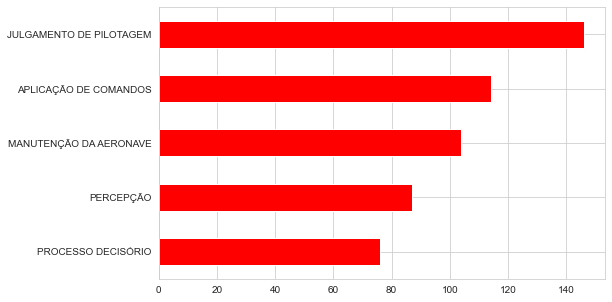

In [29]:
igdf['fator_nome'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(8, 5),color='red') 

### Fabricantes envolvidos na maior parte dos incidentes graves

<AxesSubplot:>

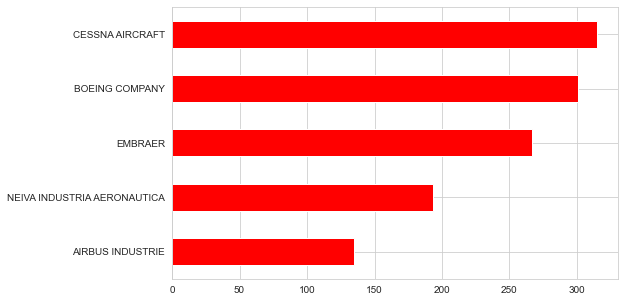

In [30]:
igdf['aeronave_fabricante'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(8, 5),color='red')

In [31]:
igdf['aeronave_fabricante'].value_counts(ascending=False, normalize=True).head() * 100

CESSNA AIRCRAFT                14.259846
BOEING COMPANY                 13.626075
EMBRAER                        12.086917
NEIVA INDUSTRIA AERONAUTICA     8.736985
AIRBUS INDUSTRIE                6.111363
Name: aeronave_fabricante, dtype: float64

### Modelos de Aeronaves envolvidas na maior parte dos incidentes graves

<AxesSubplot:>

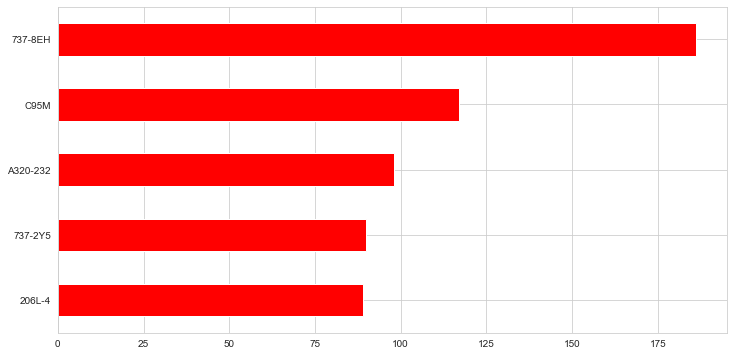

In [32]:
igdf['aeronave_modelo'].value_counts(ascending=True).tail().plot(kind="barh",figsize=(12, 6),color='r') 

In [33]:
igdf['aeronave_modelo'].value_counts(ascending=False, normalize=True).head() * 100

737-8EH     8.420100
C95M        5.296514
A320-232    4.436397
737-2Y5     4.074242
206L-4      4.028972
Name: aeronave_modelo, dtype: float64

# Análise motor tipo e motor quantidade (duas configurações de risco detectadas acima)

In [34]:
filtrobimotor = (finaldf.aeronave_motor_tipo == 'JATO') & (finaldf.aeronave_motor_quantidade == 'BIMOTOR')
finaldf[filtrobimotor].shape

(2106, 59)

In [35]:
bimotorJato = finaldf[filtrobimotor]
bimotorJato['aeronave_modelo'].value_counts(ascending=False, normalize=True).head() * 100

737-8EH            14.387464
560XLS+             9.924027
ERJ 190-200 IGW     7.739791
A320-232            6.267806
A320-214            5.508072
Name: aeronave_modelo, dtype: float64

In [36]:
lista = bimotorJato['aeronave_modelo'].value_counts(ascending=False, normalize=True).head().keys()

for modelo in lista:
    fabric = finaldf['aeronave_modelo'] == modelo
    fabric = finaldf[fabric]
    fabric = fabric.aeronave_fabricante.mode().values
    print('Modelo:', modelo, ' - Fabricante: ',fabric)

Modelo: 737-8EH  - Fabricante:  ['BOEING COMPANY']
Modelo: 560XLS+  - Fabricante:  ['CESSNA AIRCRAFT']
Modelo: ERJ 190-200 IGW  - Fabricante:  ['EMBRAER']
Modelo: A320-232  - Fabricante:  ['AIRBUS INDUSTRIE']
Modelo: A320-214  - Fabricante:  ['AIRBUS INDUSTRIE']


In [37]:
filtromonomotor = (finaldf.aeronave_motor_tipo == 'PISTÃO') & (finaldf.aeronave_motor_quantidade == 'MONOMOTOR')
finaldf[filtromonomotor].shape

(5190, 59)

In [38]:
monomotorPistao = finaldf[filtromonomotor]
monomotorPistao['aeronave_modelo'].value_counts(ascending=False, normalize=True).head() * 100

AB-115      6.840077
EMB-201A    5.838150
EMB-202     5.510597
152         4.315992
EMB-202A    4.181118
Name: aeronave_modelo, dtype: float64

In [39]:
lista = monomotorPistao['aeronave_modelo'].value_counts(ascending=False, normalize=True).head().keys()

for modelo in lista:
    fabric = finaldf['aeronave_modelo'] == modelo
    fabric = finaldf[fabric]
    fabric = fabric.aeronave_fabricante.mode().values
    print('Modelo:', modelo, ' - Fabricante: ',fabric)

Modelo: AB-115  - Fabricante:  ['AERO BOERO']
Modelo: EMB-201A  - Fabricante:  ['NEIVA INDUSTRIA AERONAUTICA']
Modelo: EMB-202  - Fabricante:  ['NEIVA INDUSTRIA AERONAUTICA']
Modelo: 152  - Fabricante:  ['CESSNA AIRCRAFT']
Modelo: EMB-202A  - Fabricante:  ['EMBRAER']


# Análise Temporal de Ocorrências

> extraindo dia, mês e ano separadamente<br>
> importando Counter da lib Collections<br>
> Criando DataFrame em ocorrências por ano e mês<br>
> Plotando com Seaborn

[Text(0, 0.5, 'Ocorrências'),
 Text(0.5, 0, 'Mês'),
 Text(0.5, 1.0, 'Ocorrências por Mês')]

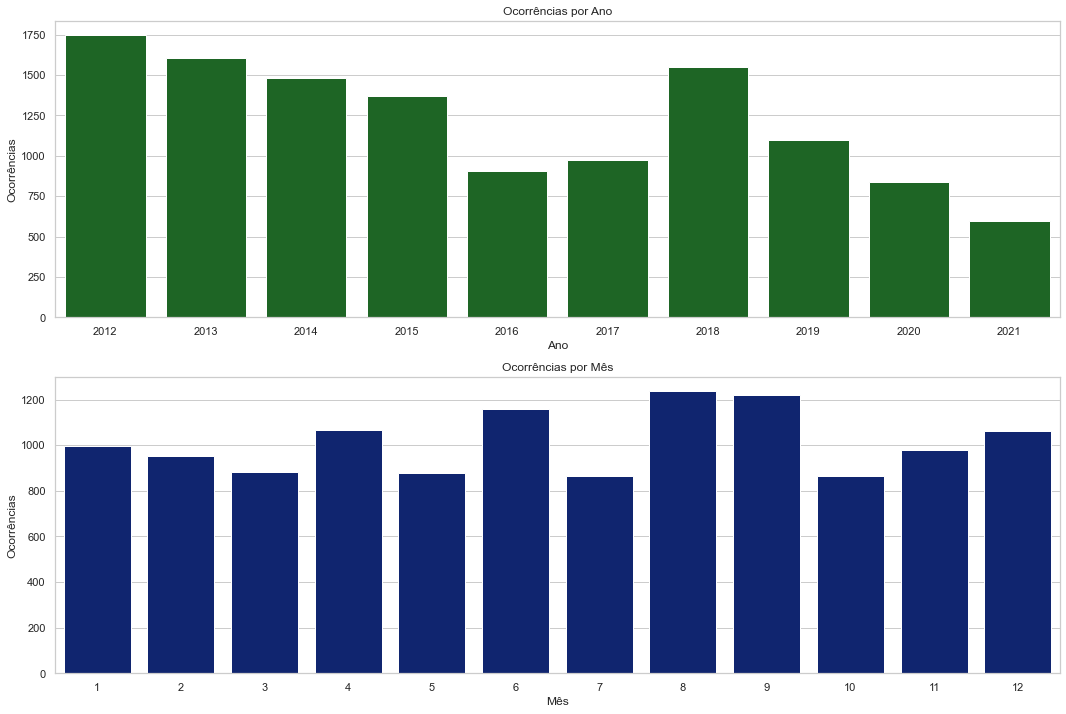

In [40]:
finaldf['ocorrencia_dia'] = pd.to_datetime(finaldf['ocorrencia_dia'])
finaldf['Dia'] = finaldf['ocorrencia_dia'].map(lambda x: x.day)
finaldf['Ano'] = finaldf['ocorrencia_dia'].map(lambda x: x.year)
finaldf['Mes'] = finaldf['ocorrencia_dia'].map(lambda x: x.month)

from collections import Counter

ocorrencias_por_ano = Counter(finaldf['Ano'])
anos = list(ocorrencias_por_ano.keys())
acidentes_ano = list(ocorrencias_por_ano.values())

ocorrencias_por_mes = Counter(finaldf['Mes'])
meses = list(ocorrencias_por_mes.keys())
acidentes_mes = list(ocorrencias_por_mes.values())

sns.set(style="whitegrid",font_scale=1)
sns.set_color_codes("dark")


fig = plt.figure(figsize=(18, 12))

sub1= fig.add_subplot(211)
sns.barplot(x=anos, y=acidentes_ano, color='g', ax=sub1)
sub1.set(ylabel="Ocorrências", xlabel="Ano", title="Ocorrências por Ano")

sub2 = fig.add_subplot(212)
sns.barplot(x=meses, y=acidentes_mes, color='b', ax=sub2)
sub2.set(ylabel="Ocorrências", xlabel="Mês", title="Ocorrências por Mês")


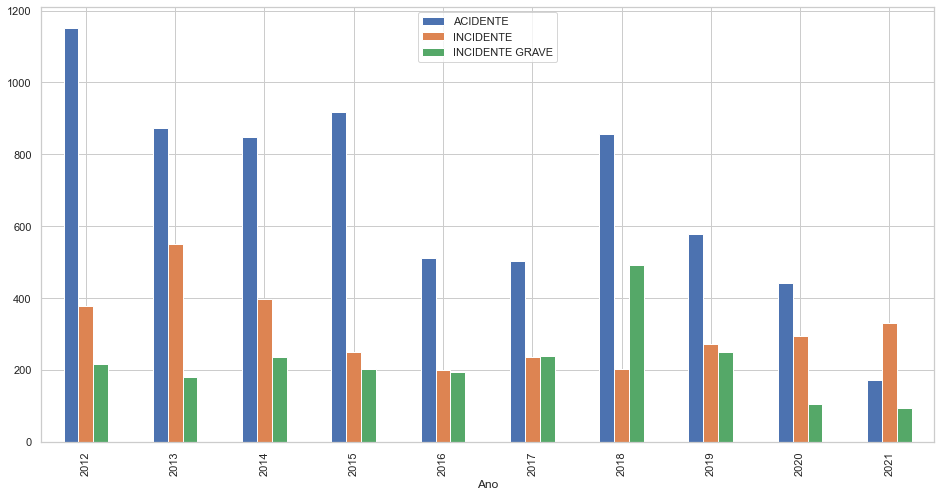

In [43]:
finaldf.groupby(['Ano'])['ocorrencia_classificacao'].value_counts().unstack().plot(kind="bar",figsize=(16, 8))
plt.legend(loc=9)

# Análise de Fatalidades

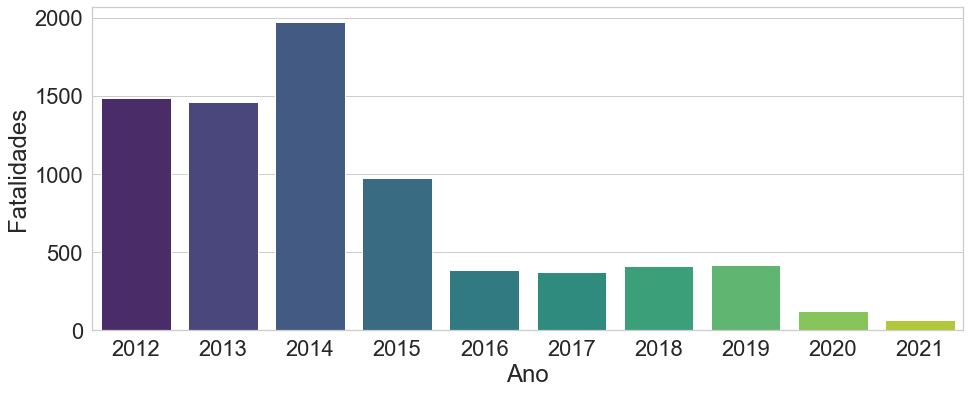

In [44]:
mortes = []
for year in anos:
    curr_data = finaldf[finaldf['Ano'] == year]
    mortes.append(curr_data['aeronave_fatalidades_total'].sum())
    

sns.set(style="whitegrid",font_scale=2)
sns.set_color_codes("dark")

fig = plt.figure(figsize=(14, 6))
sub3 = fig.add_subplot(111)
sns.barplot(x=anos, y=mortes, palette='viridis', ax=sub3)
texts = sub3.set(ylabel="Fatalidades", xlabel="Ano")
plt.tight_layout(w_pad=4, h_pad=3)

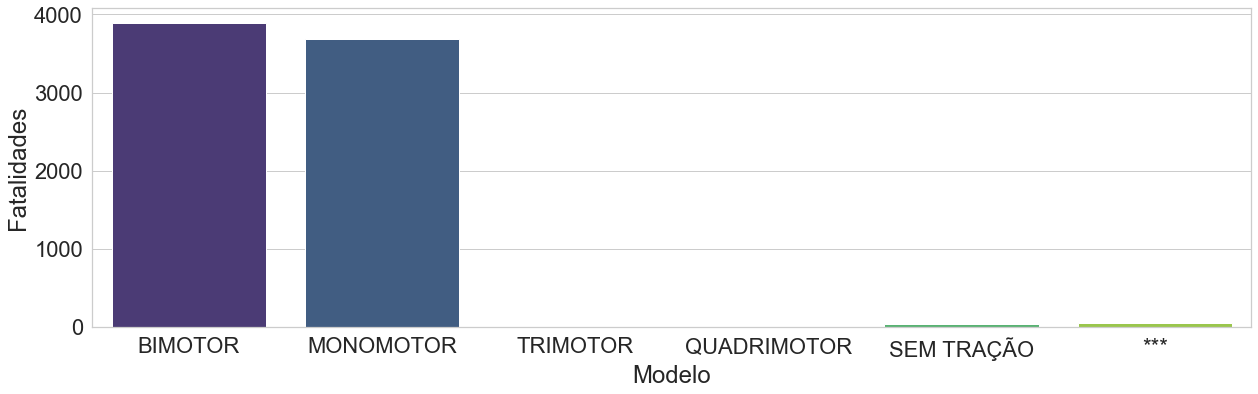

In [45]:
mortes = []
modelos = []
for modeloaero in finaldf.aeronave_motor_quantidade.unique():
    curr_data = finaldf[finaldf['aeronave_motor_quantidade'] == modeloaero]
    mortes.append(curr_data['aeronave_fatalidades_total'].sum())
    modelos.append(modeloaero)

sns.set(style="whitegrid",font_scale=2)
sns.set_color_codes("dark")

fig = plt.figure(figsize=(18, 6))
sub3 = fig.add_subplot(111)
sns.barplot(x=modelos, y=mortes, palette='viridis', ax=sub3)
texts = sub3.set(ylabel="Fatalidades", xlabel="Modelo")
plt.tight_layout(w_pad=4, h_pad=3)

# Análise das Recomendações

## Importando libs NLP

In [46]:
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WazPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WazPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Análise Recomendações de Acidentes

In [48]:
recAcidente  = adf.recomendacao_conteudo.dropna()
str(recAcidente.values)

"['Atuar junto às empresas que operam segundo o RBAC 121 de forma tal que assegure que o treinamento de Corporate Ressource Management (CRM) esteja adequado a realidade daquela empresa, que seja constantemente avaliado e reforçado (com a participação da alta direção), envolva todos os profissionais da instituição, que garanta a integração dos diferentes setores da empresa (corporate), e que, acima de tudo, faça parte da cultura de segurança de voo da organização.'\n 'Atuar junto à Administração do Aeroporto Internacional de Guarulhos, de forma que este passe a ministrar treinamento teórico e prático de atendimento às vítimas de acidentes envolvendo os principais tipos de aeronaves que operam naquela localidade, principalmente os das Linhas Aéreas Regulares, com especial ênfase ao “Layout” e aos meios de remoção de passageiros do interior destas aeronaves.'\n 'Orientar as suas organizações subordinadas em relação ao fiel cumprimento do estabelecido na ICA 100-37, de 28ABR2014, no seu it

In [50]:
def pre_processamento_texto(corpus):
    
    corpus.replace('nan','')
    #print("Processando documento")
    #print('1. Tokenização')
    corpus_alt = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
    corpus_alt = [t.lower() for t in corpus_alt] #para lowercase
    #print('2. Remove stopwords')
    pt_stops = stopwords.words('portuguese')
    corpus_alt = [t for t in corpus_alt if t not in pt_stops]
    #print('3. Remove números')
    corpus_alt = [re.sub(r'\d', '', t) for t in corpus_alt]
    #print('4. Remove pontuação')
    corpus_alt = [t for t in corpus_alt if t not in string.punctuation]
    #print('5. Remove acentos')
    #corpus_alt = [unidecode(t) for t in corpus_alt]

    return corpus_alt

recomendacoesProcess = pre_processamento_texto(str(recAcidente.values))
recomendacoesProcess

['atuar',
 'junto',
 'empresas',
 'operam',
 'segundo',
 'rbac',
 'forma',
 'tal',
 'assegure',
 'treinamento',
 'corporate',
 'ressource',
 'management',
 'crm',
 'adequado',
 'realidade',
 'daquela',
 'empresa',
 'constantemente',
 'avaliado',
 'reforçado',
 'participação',
 'alta',
 'direção',
 'envolva',
 'todos',
 'profissionais',
 'instituição',
 'garanta',
 'integração',
 'diferentes',
 'setores',
 'empresa',
 'corporate',
 'acima',
 'tudo',
 'faça',
 'parte',
 'cultura',
 'segurança',
 'voo',
 'organização',
 'atuar',
 'junto',
 'administração',
 'aeroporto',
 'internacional',
 'guarulhos',
 'forma',
 'passe',
 'ministrar',
 'treinamento',
 'teórico',
 'prático',
 'atendimento',
 'vítimas',
 'acidentes',
 'envolvendo',
 'principais',
 'tipos',
 'aeronaves',
 'operam',
 'naquela',
 'localidade',
 'principalmente',
 'linhas',
 'aéreas',
 'regulares',
 'especial',
 'ênfase',
 '“',
 'layout',
 '”',
 'meios',
 'remoção',
 'passageiros',
 'interior',
 'destas',
 'aeronaves',
 'orient

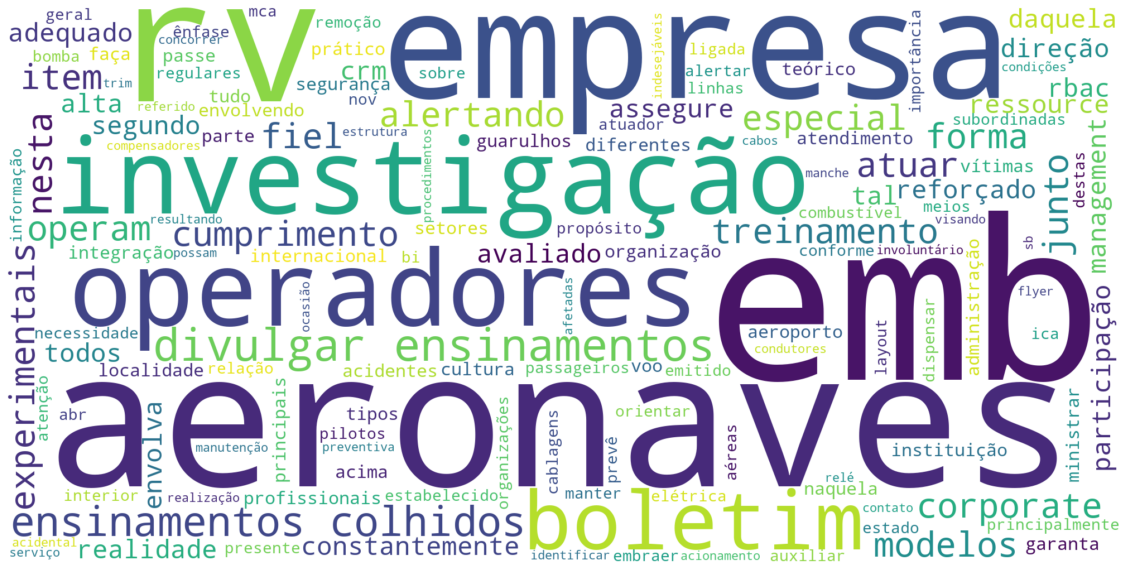

In [51]:
unique_string=(" ").join(recomendacoesProcess)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Análise Recomendações de Incidentes

In [52]:
recIncidente  = idf.recomendacao_conteudo.dropna()
str(recIncidente.values)

'[\'Notificar o fabricante da aeronave sobre o conteúdo da investigação do incidente e para que o mesmo certifique-se que os ganchos fornecidos estão em conformidade com a especificação do projeto.\'\n \'Reavaliar a validação de certificação da aeronave para transporte de carga externa tendo em vista o Laudo Técnico nº 024/AMR/2012, elaborado pelo Departamento de Ciência e Tecnologia Aeroespacial (DCTA), o qual indicou uma utilização de material inadequado na articulação do gancho de carga existente na aeronave de modelo MI-171A envolvida na ocorrência aeronáutica em questão, adquirida pela empresa Atlas Táxi-Aéreo.\'\n \'Reavaliar as condições de operação padronizadas com carga externa utilizadas pela empresa Atlas Táxi-Aéreo.\'\n \'Notificar o fabricante da aeronave sobre o conteúdo da investigação do incidente e para que o mesmo certifique-se que os ganchos fornecidos estão em conformidade com a especificação do projeto.\'\n \'Reavaliar a validação de certificação da aeronave para t

In [53]:
recomendacoesProcess2 = pre_processamento_texto(str(recIncidente.values))
recomendacoesProcess2

['notificar',
 'fabricante',
 'aeronave',
 'sobre',
 'conteúdo',
 'investigação',
 'incidente',
 'certifique',
 'ganchos',
 'fornecidos',
 'conformidade',
 'especificação',
 'projeto',
 'reavaliar',
 'validação',
 'certificação',
 'aeronave',
 'transporte',
 'carga',
 'externa',
 'tendo',
 'vista',
 'laudo',
 'técnico',
 'nº',
 'amr',
 'elaborado',
 'departamento',
 'ciência',
 'tecnologia',
 'aeroespacial',
 'dcta',
 'indicou',
 'utilização',
 'material',
 'inadequado',
 'articulação',
 'gancho',
 'carga',
 'existente',
 'aeronave',
 'modelo',
 'mi',
 'a',
 'envolvida',
 'ocorrência',
 'aeronáutica',
 'questão',
 'adquirida',
 'empresa',
 'atlas',
 'táxi',
 'aéreo',
 'reavaliar',
 'condições',
 'operação',
 'padronizadas',
 'carga',
 'externa',
 'utilizadas',
 'empresa',
 'atlas',
 'táxi',
 'aéreo',
 'notificar',
 'fabricante',
 'aeronave',
 'sobre',
 'conteúdo',
 'investigação',
 'incidente',
 'certifique',
 'ganchos',
 'fornecidos',
 'conformidade',
 'especificação',
 'projeto',
 'r

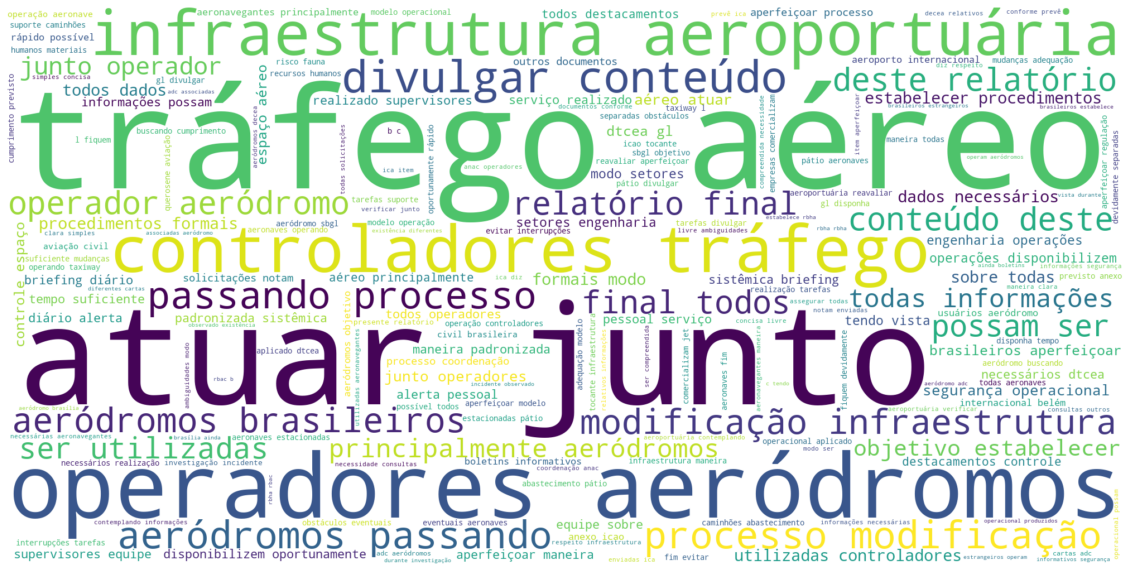

In [54]:
unique_string=(" ").join(recomendacoesProcess2)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Análise de Recomendações de Incidentes Graves

In [55]:
recIncidenteG  = igdf.recomendacao_conteudo.dropna()
str(recIncidenteG.values)

"['Assegurar-se que os pilotos que operam aeronaves pressurizadas estejam habilitados para o gerenciamento de condições de fogo/fumaça na cabine, incluindo a correta utilização das máscaras de oxigênio.'\n 'Realizar gestões junto ao operador, a fim de assegurar que todos os pilotos da companhia cumpram fielmente os procedimentos previstos no SOP da empresa e no QRH da aeronave, tanto em condições normais quanto em emergência.'\n 'Realizar gestões junto ao operador, a fim de garantir que todos os manuais da companhia sejam fielmente atualizados de acordo com os procedimentos previstos nos manuais do fabricante da aeronave.'\n ...\n 'Analisar, junto à UAP da Secretaria de Segurança Pública e Defesa Social do Estado do Ceará, a adequação dos instrumentos utilizados para a avaliação de desempenho dos copilotos, notadamente, na operação dos sistemas de navegação das aeronaves.'\n 'Atuar junto à Fênix Recuperação e Manutenção de Aeronaves Ltda., buscando assegurar que os serviços de manutenç

In [56]:
recomendacoesProcess3 = pre_processamento_texto(str(recIncidenteG.values))
recomendacoesProcess3

['assegurar',
 'pilotos',
 'operam',
 'aeronaves',
 'pressurizadas',
 'habilitados',
 'gerenciamento',
 'condições',
 'fogo',
 'fumaça',
 'cabine',
 'incluindo',
 'correta',
 'utilização',
 'máscaras',
 'oxigênio',
 'realizar',
 'gestões',
 'junto',
 'operador',
 'fim',
 'assegurar',
 'todos',
 'pilotos',
 'companhia',
 'cumpram',
 'fielmente',
 'procedimentos',
 'previstos',
 'sop',
 'empresa',
 'qrh',
 'aeronave',
 'tanto',
 'condições',
 'normais',
 'quanto',
 'emergência',
 'realizar',
 'gestões',
 'junto',
 'operador',
 'fim',
 'garantir',
 'todos',
 'manuais',
 'companhia',
 'fielmente',
 'atualizados',
 'acordo',
 'procedimentos',
 'previstos',
 'manuais',
 'fabricante',
 'aeronave',
 'analisar',
 'junto',
 'uap',
 'secretaria',
 'segurança',
 'pública',
 'defesa',
 'social',
 'estado',
 'ceará',
 'adequação',
 'instrumentos',
 'utilizados',
 'avaliação',
 'desempenho',
 'copilotos',
 'notadamente',
 'operação',
 'sistemas',
 'navegação',
 'aeronaves',
 'atuar',
 'junto',
 'fêni

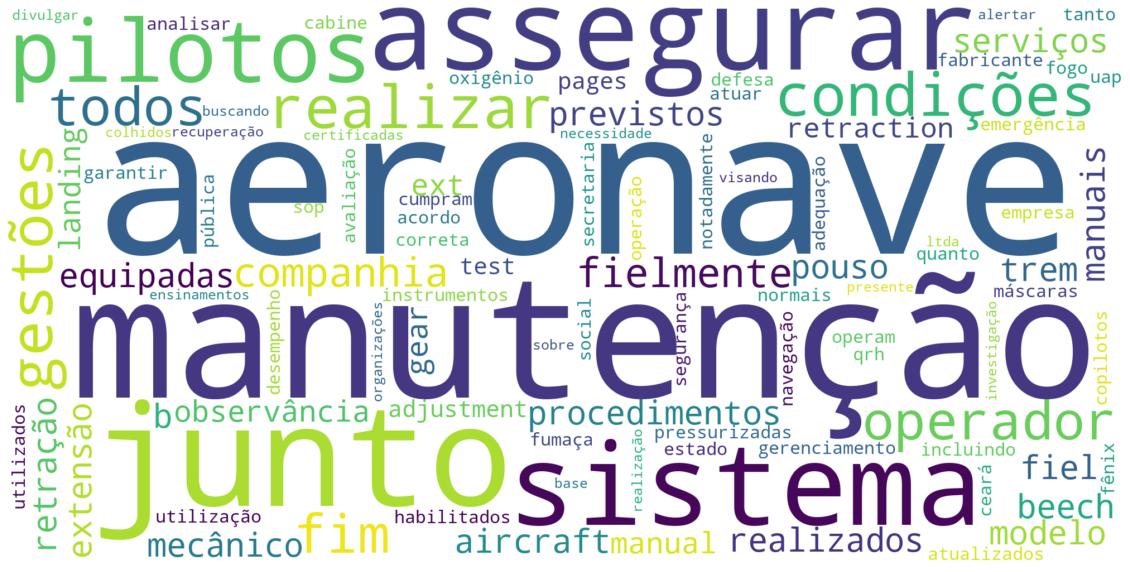

In [57]:
unique_string=(" ").join(recomendacoesProcess3)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()